# polARosol: for a brighter future?
## **POL**ar **A**tmospheric **R**ivers and how they are influenced by Ae**ROSOL**s and how that might affect cloud **BRIGHT**ness but mostly other parameters now and in the **FUTURE**


Lea Haberstock 

lea.haberstock@gmail.com

eScience course 2022, Group 5, December 2nd 2022

Group Assistant: Rémy Lapere

## Abstract
1/2 page max

## 1 Introduction

The polar regions are highly sensitive to changes in temperature and energy flux due to different positive feedback mechanisms. As a result of this sensitivity, the polar regions warm faster than the global mean temperature, an effect also known as Polar amplification (e.g., Manabe and Wetherald, 1975). The surface albedo feedback describes one of the main effects of a positive enhancement of temperature increase and was first described by Arrhenius in 1896. With rising temperatures, ice and snow will melt and decrease the albedo in high latitudes, resulting in higher absorption of radiation and temperature. 

Increasing downward longwave radiation was found to play an important role regarding sea ice retreat. In die Arctic, horizontal moisture transported and warm air advection from lower latitudes are the main cause for an increase in the downward longwave radiation (D.-S. R. Park et al. 2015). Woods et al. (2013) found that small and thin but intense moisture injections are the main driver of variance in arctic mean surface air temperature and downward longwave radiation. In Antarctica, moist and warm air intrusions are considered to play a critical role in surface melting on major ice shelves due to an increase in integrated water vapor and cloud liquid and ice water content. 

Streams of intense moisture are also known as Atmospheric rivers (AR) which are vapor rich meridional air masses originating from the tropics or subtropics. An atmospheric river is defined as 'A long, narrow, and transient corridor of strong horizontal water vapor transport that is typically associated with a low-level jet stream ahead of the cold front of an extratropical cyclone' (Glossary of Meteorology, 2020). ARs are responsible for over 90 % of meridional vapor transport in the mid latitudes (Nash et al., 2018). In polar regions ARs perturb the usually thermodynamically stable systems and enhance temperature, humidity, precipitation, cloud cover and can change the aerosol number concentration and size distribution (Dada et al., 2022; Wille et al., 2021). 

In the Arctic, the frequency of AR occurence increased in the past decades (Dada et al., 2022). With a changing climate and polar amplification, the influcence of ARs on the polar systems might change from the effects that are seen now. To understand the role of polar ARs in the future we are investigating affected parameters in historical and future model scenarios. The main reasearch questions are (1) What influence do ARs have on cloud cover, aerosol optical depth (AOD), temperature, and precipitation and (2) how will the effect of polar atmospheric rivers on clouds, aerosol optical depth, temperature anomaly and precipitation change in the future? It is expected that ARs increase cloud cover, temperature, and precipitation and can increase AOD if they travel over polluted areas before they reach the arctic. It is also expected that the occurence and the effect of ARs on the investigated parameters will increase more in future scenarios with stronger climate change. 



## 2 Data and Methods

### 2.1 Packages

In [ ]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import s3fs
import intake
import cftime
import numpy as np
from netCDF4 import Dataset
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.path as mpath
# my functions
#from all_functions import *
xr.set_options(display_style='html')
import warnings
warnings.filterwarnings('ignore')
# 

### 2.2 Datasets

**NorESM-LM2** The Norwegian Earth System Model (NorESM) is part of the sixth Coupled Model Intercomparison Project (CMIP6). The scenarios ssp245, ssp370, and ssp585, (years 2085-2100) and the 'historical' (years 2000-2014) experiments with the run 'r1i1p1f1' were selected. The investigated variables are precipitation (pr), cloud cover (clt), specific humidity (hus), poleward wind component (va), and surface temperature (tas).

**Atmospheric River Detection Algorithm** The basis for the atmospheric river detection algorithm (ARDA) used in this work was developed by Wille et al. (2021) and adapted for this project during data analysis. Atmospheric rivers are detected via a threshold for integrated water vapor (IVT) multiplied with the meridional wind component. The threshold is defined by calculating the 93rd quantile of IVT in every grid cell of the historical data. An atmospheric river is then only detected if a cluster of connected grid cells over 20 ° lat exceed the calculated threshold. The code for the ARDA in this project was written by Rémy Lapere. 
Computing the ARs is dependent on a package that was not provided by the working environment of the jupyterhub for this course. We therefore had to compute the AR offline but the code for the generated data is provided.

In [ ]:
%load_ext autoreload
%autoreload 2
# import historical and scenario data 
# Data is selected for 60°-90° north and south and until plev = 25000 Pa
# (s = Antarctic, n = Arctic; h = historical, 245 = ssp245, 370 = ssp370, 585 = ssp585)
from all_functions import nh, sh, n245, s245, n370, s370, n585, s585 

# import detected atmospheric rivers for every scenario
# Data computed by Julia Asplund
arh = xr.open_dataset('combined_hist_q94.nc')
ar245 = xr.open_dataset('combined_ssp245_q94.nc')
ar370 = xr.open_dataset('combined_ssp370_q94.nc')
ar585 = xr.open_dataset('combined_ssp585_q94.nc')

### 2.3 Analysis method

Within the historical dataset, the data was masked and split into two different subsets. One subset contained only data in ARs and one only had data outside of ARs. The data outside of ARs were conditioned to have a poleward wind component because it is also a condition for AR detection. Between these two datasets frequency distributions of temperature, integrated humidity, precipitation, AOD and cloud cover were compared.

Additionally, the frequency distributions of the temperature anomaly, humidity, precipitation, AOD and cloud cover within ARs were compared between the different scenarios. To undrestand whether there is a significant different between these distributions a Wilcoxon test was applied between all scenarios for the mentioned variables.

In [ ]:
## mask data for being inside (masked) or outside (neg) of a atmospheric river
# arctic
masked_n245 = n245.where(ar245['ivt']==True)
masked_n370 = n370.where(ar370['ivt']==True)
masked_n585 = n585.where(ar585['ivt']==True)
masked_nh = nh.where(arh['ivt']==True)
neg_n245 = n245.where(ar245['ivt']==False | n245['va'] > 0 )
neg_n370 = n370.where(ar370['ivt']==False | n370['va'] > 0)
neg_n585 = n585.where(ar585['ivt']==False | n585['va'] > 0)
neg_nh = nh.where(arh['ivt']==False | nh['va'] > 0)

# antarctic
masked_s245 = s245.where(ar245['ivt']==True)
masked_s370 = s370.where(ar370['ivt']==True)
masked_s585 = s585.where(ar585['ivt']==True)
masked_sh = sh.where(arh['ivt']==True)
neg_s245 = s245.where(ar245['ivt']==False | s245['va'] > 0)
neg_s370 = s370.where(ar370['ivt']==False | s370['va'] > 0)
neg_s585 = s585.where(ar585['ivt']==False | s585['va'] > 0)
neg_sh = sh.where(arh['ivt']==False | sh['va'] > 0)

## treating data for frequency analysis; flatten arrays and remove nan values
#int_hum = integrated humidity, aod = aerosol optical depth, precip = preicipitation, temp = surface temperature anomaly, cloud = cloud cover
from all_functions import int_hum, aod, preicp, temp_anom, cloud, temp

# using randomly sampled subsets of the same sample size for Wilcoxon test (extra s indicates antarctic data)
#from all_functions import sized_hum, sized_temp, sized_aod, sized_precip, 
#sized_cloud, ssized_hum, ssized_temp, ssized_aod, ssized_precip, ssized_cloud
from all_functions import sized_*, ssized_* 

## 3 Results
### 3.1 Comparison inside and outside AR

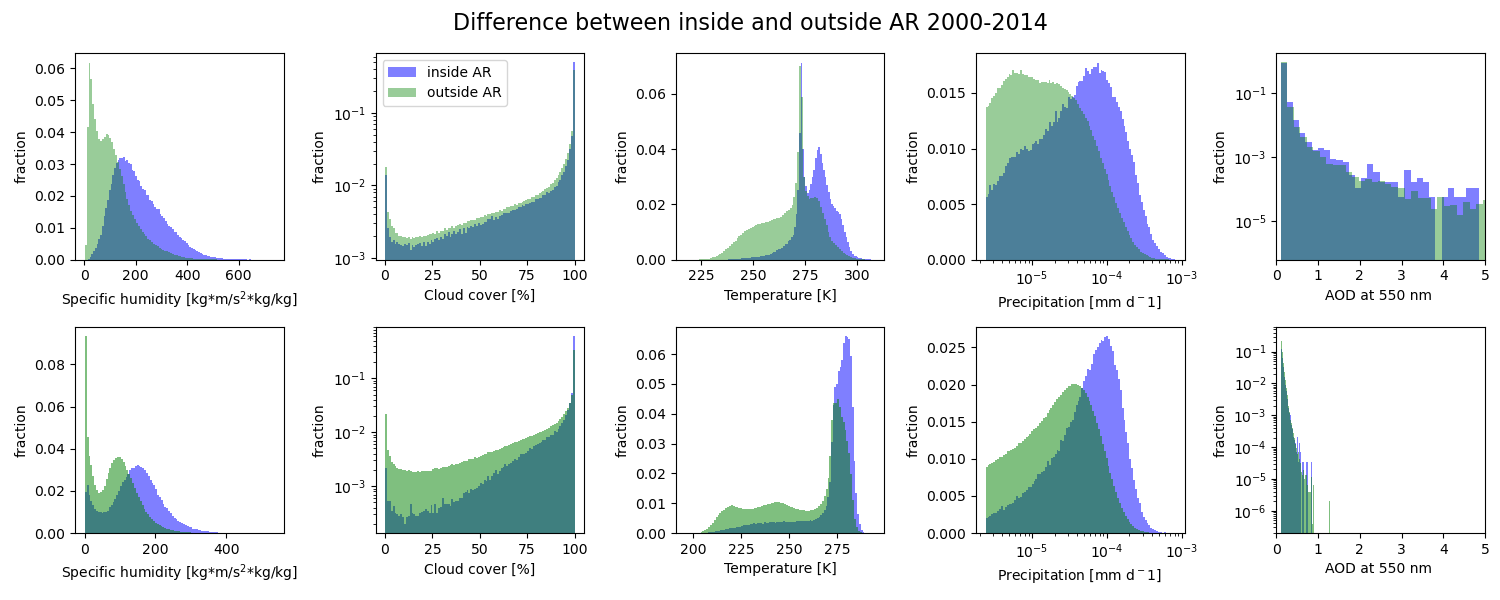

In [1]:
from IPython.display import Image
Image('in_out_AR.png')

### 3.2 Trends in Future Scanrios

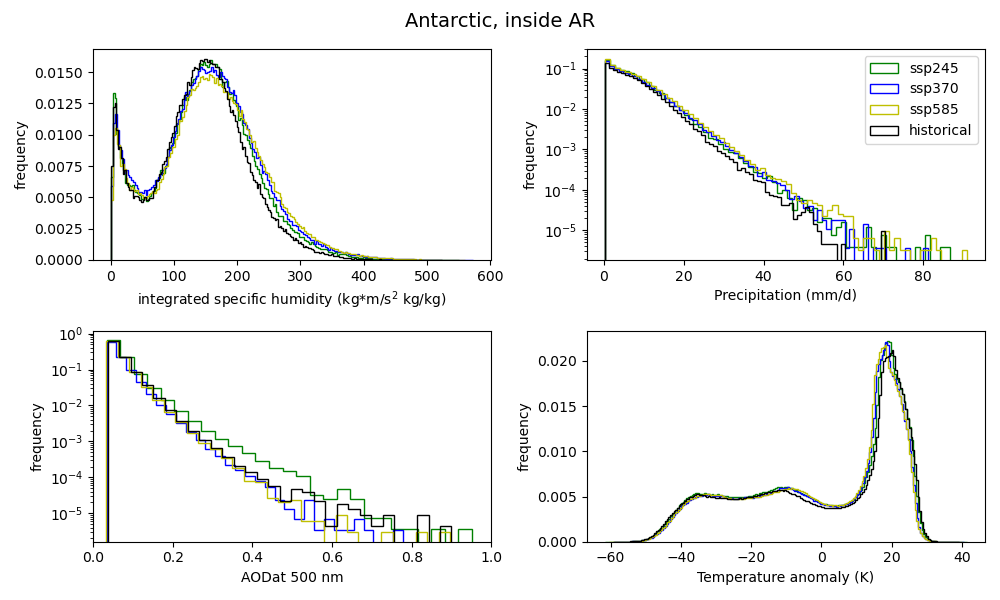

In [4]:
from IPython.display import Image
Image('Arctic_future.png')


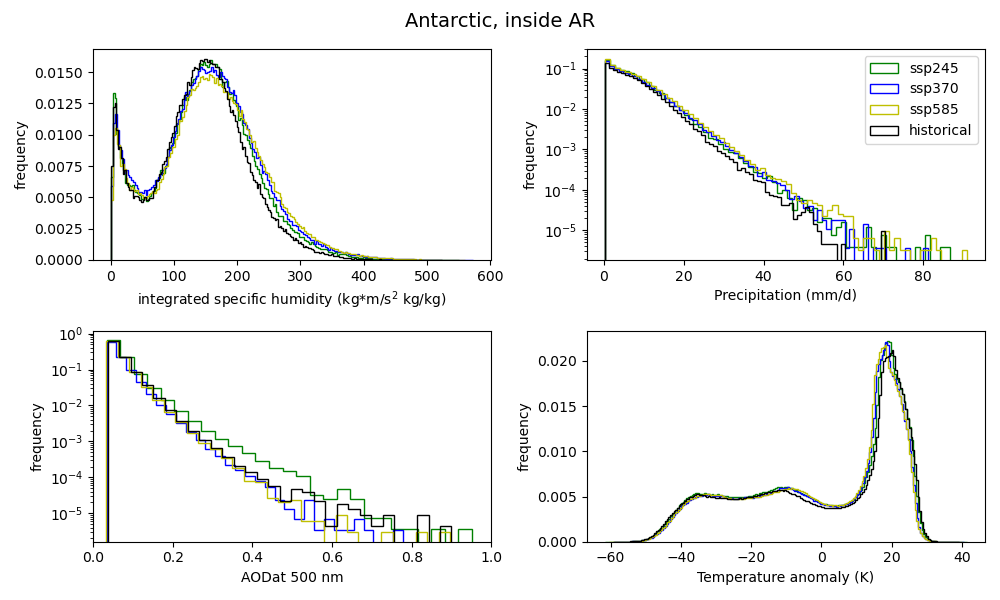

In [5]:
Image('Antarctic_future.png')

In [ ]:
#Wilcoxon tests

#humidity
whn245_370 = wilcoxon(sized_hum['nh245sized'],sized_hum['nh370sized'])
whn245_585 = wilcoxon(sized_hum['nh245sized'],sized_hum['nh585sized'])
whn245_nh = wilcoxon(sized_hum['nh245sized'],sized_hum['nhhsized'])
whn370_585 = wilcoxon(sized_hum['nh370sized'],sized_hum['nh585sized'])
whn370_nh = wilcoxon(sized_hum['nh370sized'],sized_hum['nhhsized'])
whn585_nh = wilcoxon(sized_hum['nh585sized'],sized_hum['nhhsized'])

w_humidity = np.array([whn245_370,whn245_585,whn245_nh,whn370_585,whn370_nh,whn585_nh])

# AOD
wan245_370 = wilcoxon(sized_aod['na245sized'],sized_aod['na370sized'])
wan245_585 = wilcoxon(sized_aod['na245sized'],sized_aod['na585sized'])
wan245_na = wilcoxon(sized_aod['na245sized'], sized_aod['nahsized'])
wan370_585 = wilcoxon(sized_aod['na370sized'],sized_aod['na585sized'])
wan370_na = wilcoxon(sized_aod['na370sized'], sized_aod['nahsized'])
wan585_na = wilcoxon(sized_aod['na585sized'], sized_aod['nahsized'])

w_aod = np.array([wan245_370,wan245_585,wan245_na,wan370_585,wan370_na,wan585_na])

# precipitation
wpn245_370 = wilcoxon(sized_precip['np245sized'],sized_precip['np370sized'])
wpn245_585 = wilcoxon(sized_precip['np245sized'],sized_precip['np585sized'])
wpn245_na = wilcoxon(sized_precip['np245sized'], sized_precip['nphsized'])
wpn370_585 = wilcoxon(sized_precip['np370sized'],sized_precip['np585sized'])
wpn370_np = wilcoxon(sized_precip['np370sized'], sized_precip['nphsized'])
wpn585_np = wilcoxon(sized_precip['np585sized'], sized_precip['nphsized'])

w_precip = np.array([wpn245_370,wpn245_585,wpn245_na,wpn370_585,wpn370_np,wpn585_np])

# temperature anomaly

sized_aod
sized_precip
sized_cloud
ssized_hum



## 4 Discussion and Outlook 


- results as expected
    - same shift in results for poles different magnitudes
    - higher humidity: check if everything works
    - more often 100 % cloud cover
    - higher temperatures 
    - stronger precipitation
    - aod data did not work yet
    
- discussion: specific humidity integration --> weird
- antarctic changes for cloud cover and precipitation stronger

discussion 
- AOD and Precipitation weird plots still
- shift of humidity with stronger climate change 
    - more moisture transport
- decrease of temperature anomaly 
    - polar amplification decrease temperature difference between midlatitudes and polar regions
    - difference between scenarios stronger at arctic than antarctic
- ssp245 weirdly high aerosol load in comparison but aod data is still broken

## Conclusion
The working hypotheses could be answered


## References
American Meteorological Society. 2020, Glossary of Meteorology, url: https://glossary.ametsoc.org/wiki/Atmospheric_river, last accessed at 16.11.22

Woods C and Caballero R., 2016, The Role of Moist Intrusions in Winter Arctic Warming and Sea Ice Decline

Manabe and Wetherald, 1975

Woods et al., 2013, Large-scale circulation associated with moisture intrusions into the Arctic during winter, 

(D.-S. R. Park et al. 2015)

Wille et al., 2021, 2017?

Dada et al., 2022, A central arctic extreme aerosol event triggered by a warm air-mass intrusion

## Acknowledgments (helpers, collaborators, model and data owners/providers)
## Supplementary material (extra figures, functions, pre-processing routines)